# Kinematical reconsutrction
Study our ability to reconstruct $Q^2$ and $p_p$ using the overlay

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/KinematicalReconstruction/'

In [3]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [4]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print "%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume'; print_line()

OverlayPairsFV, OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

38163 pairs from On-Beam, 24323 in Fiducial Volume
--------------------------------------------------------------
283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%


In [5]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt & delta phi'
              ]
cutlabels = ['preselection'
             ,'$dE/dx$ profile'
             ,'optical filter'
             ,'track lengths'
             ,'collinearity'
             ,'vertex activity'
             ,'coplanarity'
             ,r'$p_t$ imbalance'
            ]

### re-scaling the cosmic in the overlay

In [6]:
overlay_scalings = dict()
overlay_scalings['N(On) scaling'] = get_samples_scaling( N_total= float(len(OnBeamFV)), f_Cosmic=None  , OverlaySubsamples=OverlaySamples)
f_Cosmic=0.909
overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)), f_Cosmic=f_Cosmic, OverlaySubsamples=OverlaySamples)
print 'overlay scalings';pp.pprint(overlay_scalings)

overlay scalings
{   'N(On) scaling': {   '1mu-1p': 0.13042872080864412,
                         'CC 1p 0pi': 0.13042872080864415,
                         'N(Ovelay)/N(On)': 7.667022982362373,
                         'cosmic': 0.13042872080864412,
                         'other pairs': 0.13042872080864415},
    'N(On) scaling and f(cosmic)=0.91': {   '1mu-1p': 0.024262743077631366,
                                            'CC 1p 0pi': 0.024262743077631366,
                                            'N(Ovelay)/N(On)': 7.667022982362373,
                                            'cosmic': 0.23209992756589928,
                                            'other pairs': 0.024262743077631366}}


In [7]:
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order
                                                                   ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic])
print 'applied cuts to overlay'
reducedOnBeam,BeamOnNumbers = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'applied cuts to data'

applied cuts to overlay
applied cuts to data


### a list of the selected events

In [15]:
selected_events = reducedOnBeam['Pt & delta phi']
print len(selected_events),'selected pairs in data'
selected_overlay=dict()
for pair_type in pair_types:
    selected_overlay[pair_type] = reducedOverlay['Pt & delta phi'][pair_type]
print len(pd.concat([selected_overlay['1mu-1p'],selected_overlay['cosmic'],selected_overlay['other pairs']])),'events in the overlay'
selected_CC1p0pi = selected_overlay['CC 1p 0pi']
print len(selected_CC1p0pi),'selected CC 1p 0pi pairs in overlay'

350 selected pairs in data
9384 events in the overlay
7304 selected CC 1p 0pi pairs in overlay


In [16]:
# tight FV
max_FV_y = 104 
min_FV_z,max_FV_z = 5,1020
min_FV_x,max_FV_x = 5,240

selected_overlay_tightFV=dict()
for pair_type in pair_types:
    selected_overlay_tightFV[pair_type] = sample_in_FV(selected_overlay[pair_type]
                                                       ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
overlay_tightFV = pd.concat([selected_overlay_tightFV['1mu-1p'],selected_overlay_tightFV['cosmic'],selected_overlay_tightFV['other pairs']])
print len(overlay_tightFV),'events in the overlay'

print len(selected_overlay_tightFV),'selected overlay in tight FV'
selected_CC1p0pi_tightFV = sample_in_FV(sample=selected_CC1p0pi
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_CC1p0pi_tightFV),'selected CC1p0π in overlay in tight FV'
selected_events_tightFV = sample_in_FV(sample=selected_events
                                   ,max_FV_y = max_FV_y ,min_FV_z = min_FV_z, max_FV_z = max_FV_z,min_FV_x = min_FV_x, max_FV_x = max_FV_x)
print len(selected_events_tightFV),'selected pairs in data in tight FV'

5294 events in the overlay
4 selected overlay in tight FV
4064 selected CC1p0π in overlay in tight FV
182 selected pairs in data in tight FV


### Kinematical distributions of the selected events

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/KinematicalReconstruction/Q2_reconstruction.pdf


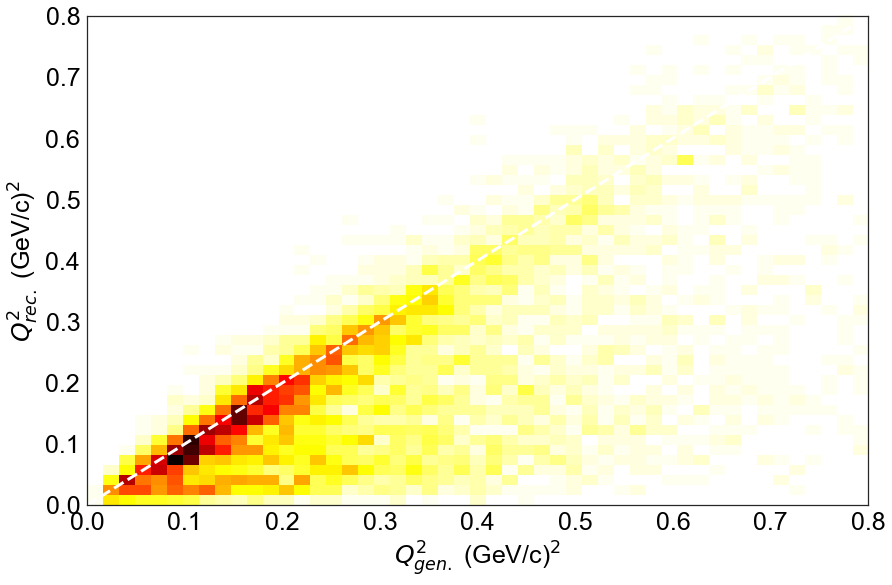

In [18]:
fig,ax=plt.subplots(figsize=(14,9))
plot_2d_hist(selected_CC1p0pi['truth_Q2'],selected_CC1p0pi['reco_Q2']
             ,xlabel=r'$Q^2_{gen.}$ (GeV/c)$^2$',ylabel=r'$Q^2_{rec.}$ (GeV/c)$^2$'
             ,bins=linspace(0,0.8,50)
             ,ax=ax);
ax.plot([0,0.8],[0,0.8],'--',color='white',alpha=1,linewidth=3)
save_figure(figures_path+'Q2_reconstruction.pdf')

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/KinematicalReconstruction/p_reconstruction.pdf


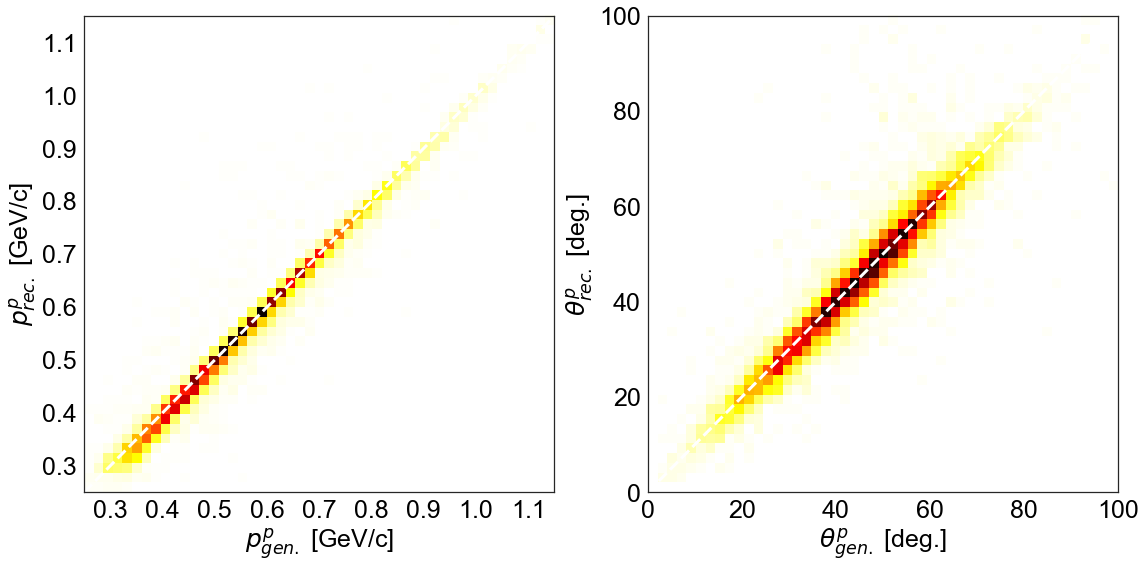

In [24]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,2,1)
plot_2d_hist(selected_CCQElike['truth_Pp'],selected_CCQElike['reco_Pp']
             ,xlabel=r'$p^p_{gen.}$ [GeV/c]',ylabel=r'$p^p_{rec.}$ [GeV/c]'
             ,bins=linspace(0.25,1.15,50)
             ,ax=ax);
ax.plot([0.25,1.15],[0.25,1.15],'--',color='white',alpha=1,linewidth=3)

ax=fig.add_subplot(1,2,2)
plot_2d_hist(180/np.pi*selected_CCQElike['truth_Pp_theta'],180/np.pi*selected_CCQElike['reco_Pp_theta']
             ,xlabel=r'$\theta^p_{gen.}$ [deg.]',ylabel=r'$\theta^p_{rec.}$ [deg.]'
             ,bins=linspace(0.,100,50)
             ,ax=ax);
ax.plot([0.,100],[0.,100],'--',color='white',alpha=1,linewidth=3)
plt.tight_layout()
save_figure(figures_path+'p_reconstruction.pdf')

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/KinematicalReconstruction/mu_reconstruction.pdf


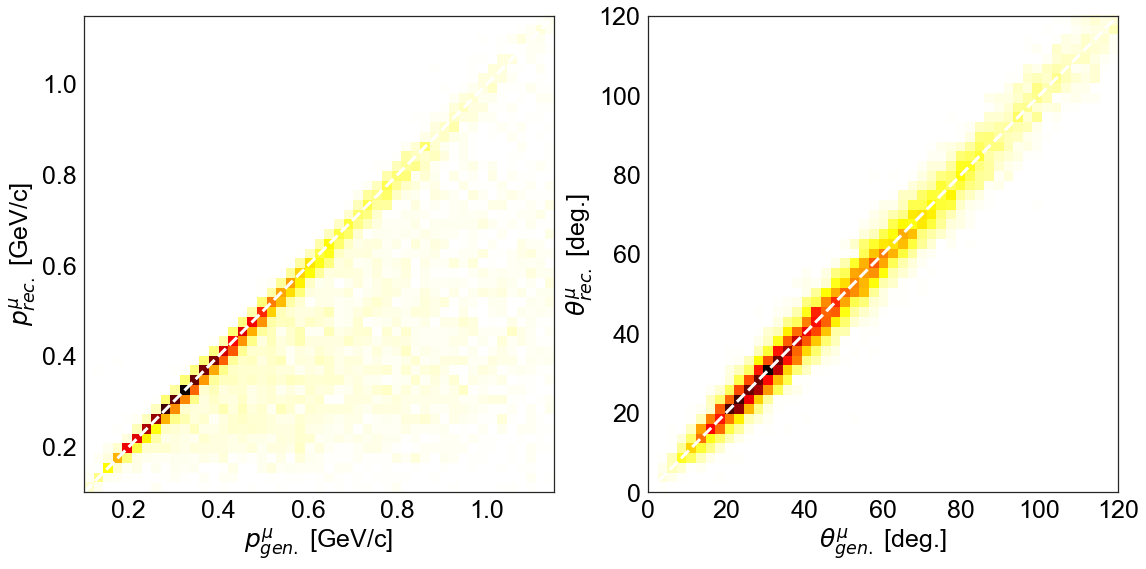

In [30]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,2,1)
plot_2d_hist(selected_CCQElike['truth_Pmu'],selected_CCQElike['reco_Pmu']
             ,xlabel=r'$p^\mu_{gen.}$ [GeV/c]',ylabel=r'$p^\mu_{rec.}$ [GeV/c]'
             ,bins=linspace(0.1,1.15,50)
             ,ax=ax);
ax.plot([0.1,1.15],[0.1,1.15],'--',color='white',alpha=1,linewidth=3)

ax=fig.add_subplot(1,2,2)
plot_2d_hist(180/np.pi*selected_CCQElike['truth_Pmu_theta'],180/np.pi*selected_CCQElike['reco_Pmu_theta']
             ,xlabel=r'$\theta^\mu_{gen.}$ [deg.]',ylabel=r'$\theta^\mu_{rec.}$ [deg.]'
             ,bins=linspace(0.,120,50)
             ,ax=ax);
ax.plot([0.,120],[0.,120],'--',color='white',alpha=1,linewidth=3)
plt.tight_layout()
save_figure(figures_path+'mu_reconstruction.pdf')

# now tight FV

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/KinematicalReconstruction/Q2_reconstruction_tightFV.pdf


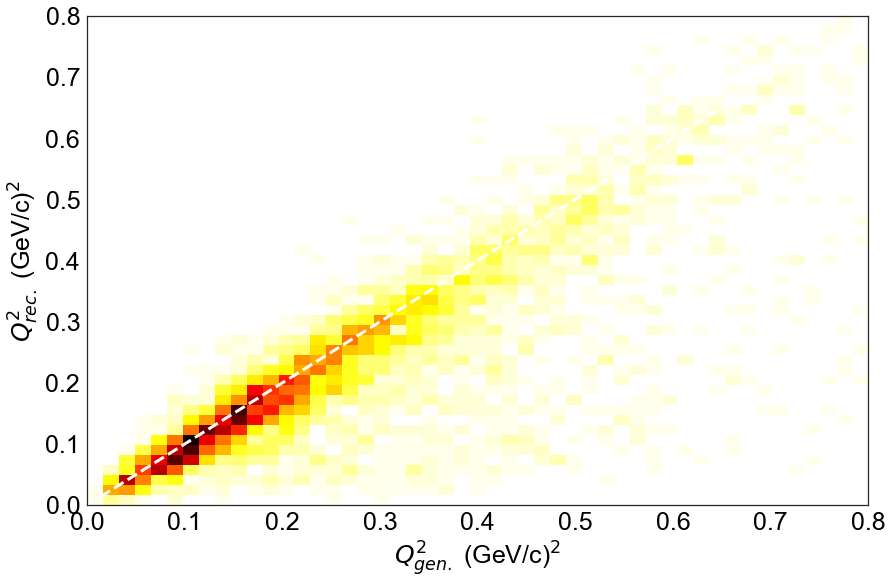

In [26]:
fig,ax=plt.subplots(figsize=(14,9))
plot_2d_hist(selected_CC1p0pi_tightFV['truth_Q2'],selected_CC1p0pi_tightFV['reco_Q2']
             ,xlabel=r'$Q^2_{gen.}$ (GeV/c)$^2$',ylabel=r'$Q^2_{rec.}$ (GeV/c)$^2$'
             ,bins=linspace(0,0.8,50)
             ,ax=ax);
ax.plot([0,0.8],[0,0.8],'--',color='white',alpha=1,linewidth=3)
save_figure(figures_path+'Q2_reconstruction_tightFV.pdf')